In [1]:
from scipy.spatial import distance_matrix
from PIL import Image
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
inputpath = '../Data/CleanedImages/'
outputpath = '../Data/SegmentedImages/'
featurespath = '../Data/Features/'

# Image Segmentation

## Based on distances to centroids

In [3]:
#Setup cluster centers for segmentation
cluster_centers=[]

# cluster_centers.append([255,0,0])       #red
# cluster_centers.append([220,110,90])    #light red
# cluster_centers.append([125,0,0])       #dark red
# cluster_centers.append([125,255,0])     #green
# cluster_centers.append([125,255,125])   #light green
# cluster_centers.append([200,200,200])   #light grey
# cluster_centers.append([0,0,255])       #blue
# cluster_centers.append([125,180,200])   #light blue
# cluster_centers.append([180,200,255])   #light purple
# cluster_centers.append([0,0,125])       #dark blue
# cluster_centers.append([255,255,0])     #yellow
# cluster_centers.append([255,160,50])    #beige

cluster_centers.append([0,0,0])         #black

cluster_centers.append([70,70,70])      #dark grey
cluster_centers.append([125,125,125])   #grey
cluster_centers.append([180,180,180])   #light grey

cluster_centers.append([255,255,255])   #white

cluster_centers.append([50,70,0])       #dark green
cluster_centers.append([160,160,90])    #light green

cluster_centers.append([90,120,145])    #dark blue
cluster_centers.append([130,160,190])   #light blue

cluster_centers.append([100,40,30])      #dark red
cluster_centers.append([210,100,90])     #red
cluster_centers.append([120,110,100])    #orange/brown

cluster_centers=np.array(cluster_centers)    

rows = 600
cols = 600

def open_image(nb):
    #Open original image
    image_path = inputpath + str(nb) + ".jpg"
    original_image = Image.open(image_path)

    #Flatten the image
    flattened_image = np.array(original_image)
    flattened_image = flattened_image.reshape(rows*cols, 3)
    return original_image, flattened_image

def segment_images(nb_images):
    #Prepare the output, which is a matrix whose lines correspond to each image, and columns to the pixels. The value is the label of the class this pixel in this image belongs to.
    images_labels = np.zeros((nb_images,rows*cols))

    for i in range(nb_images):

        #Open the image
        original_image, flattened_image = open_image(i)

        #Assign the labels based on the distance to the cluster centers.
        dist_mat = distance_matrix(flattened_image, cluster_centers)
        assignments = np.argmin(dist_mat, axis=1)

        #Replace each pixel value with its nearby centroid
        segmented_image = cluster_centers[assignments]
        images_labels[i] = assignments
        segmented_image = np.clip(segmented_image.astype('uint8'), 0, 255)

        #Reshape the image to original dimension
        segmented_image = segmented_image.reshape(rows, cols, 3)

        #Save the segmented image in the folder
        output_path = outputpath + str(i) + ".jpg"
        im = Image.fromarray(segmented_image)
        im.save(output_path)

        #Print a result every 20 steps
        if(i % 20 == 0):
            print("Image " + str(i))
            fig = plt.figure()

            #Visualize segmented images against original

            ax1 = fig.add_subplot(1, 2, 1)
            ax1.imshow(original_image, cmap='Greys_r')
            ax2 = fig.add_subplot(1, 2, 2)
            ax2.imshow(segmented_image, cmap='Greys_r')
            plt.tight_layout()
            plt.show()

    return images_labels

Image 0


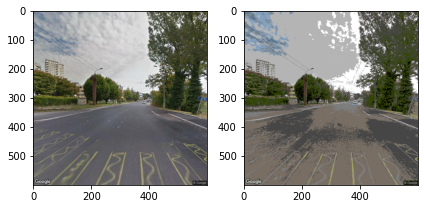

Image 20


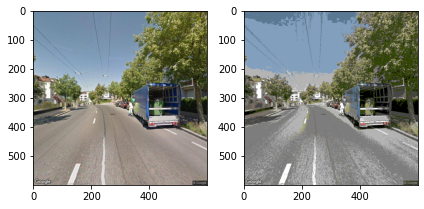

Image 40


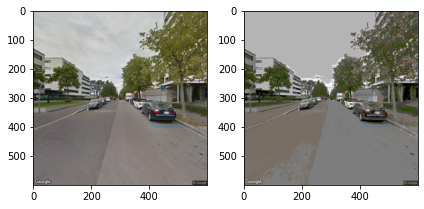

Image 60


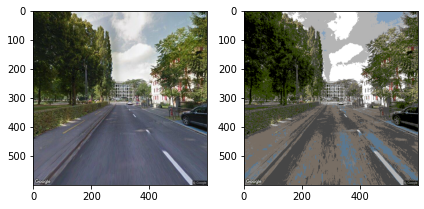

Image 80


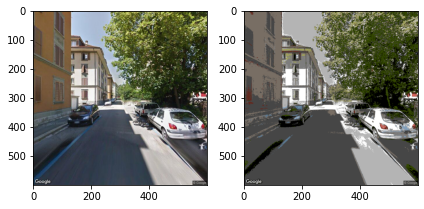

Image 100


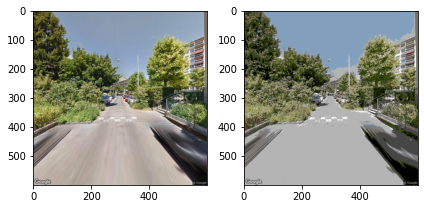

Image 120


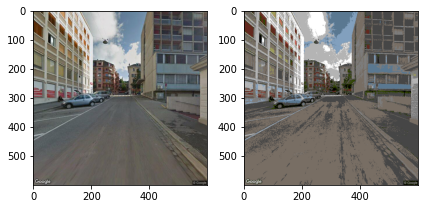

Image 140


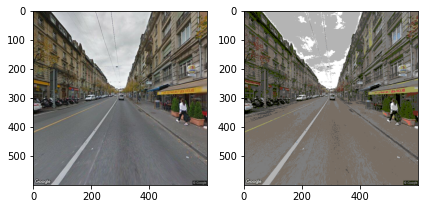

Image 160


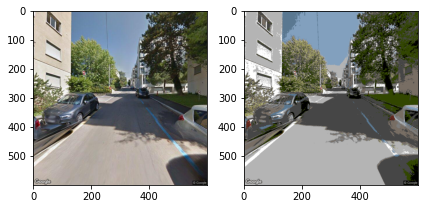

Image 180


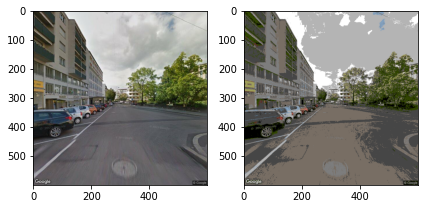

Image 200


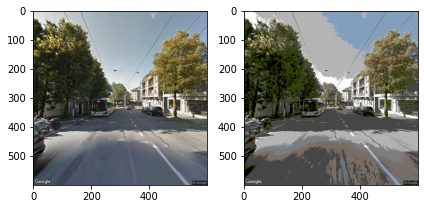

Image 220


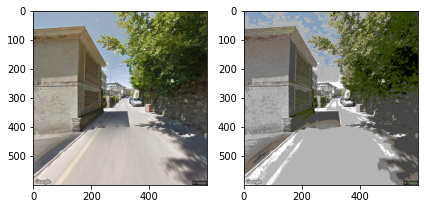

Image 240


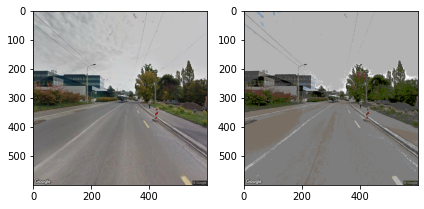

Image 260


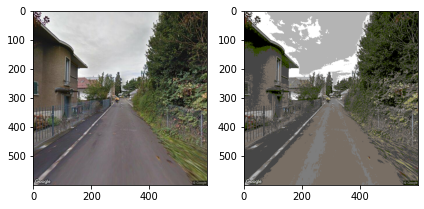

Image 280


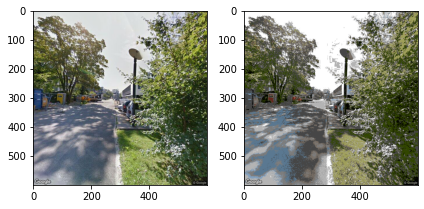

Image 300


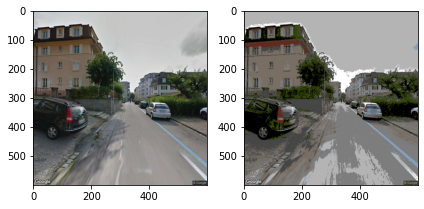

Image 320


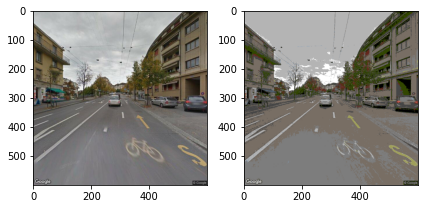

Image 340


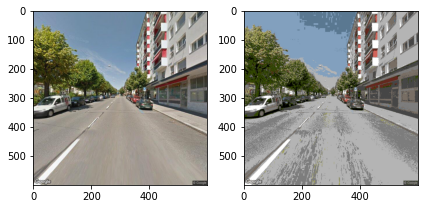

Image 360


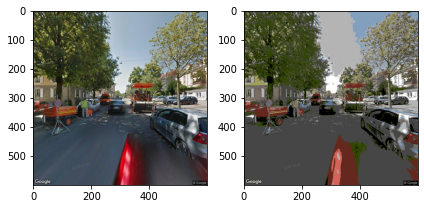

Image 380


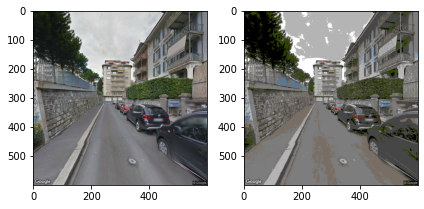

Image 400


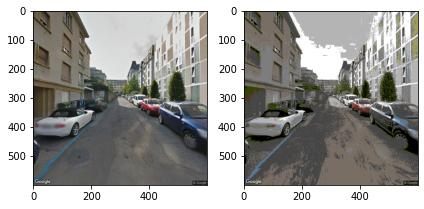

Image 420


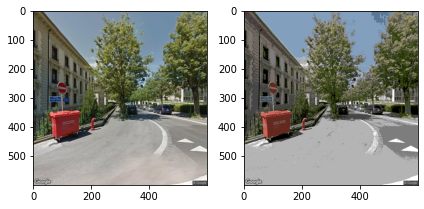

Image 440


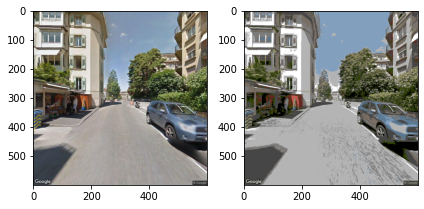

In [4]:
images_labels = segment_images(458)

In [5]:
#Get color classes from segmentation by counting number of pixels in each of the (nb_clusters) classes
def get_info_images_labels(nb_images):
    features = np.zeros((nb_images, cluster_centers.shape[0]))

    for n in range(nb_images):

        labels = images_labels[n]
        for k in range(cluster_centers.shape[0]):
            features[n,k] = np.count_nonzero(labels == k)       
        
    return features

features = get_info_images_labels(458)

#Store the computed features in a dataframe
df = pd.DataFrame(features)

df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,16648.052402,70082.227074,46329.956332,91612.386463,15799.126638,28221.582969,6649.506550,5282.674672,20535.379913,3318.770742,365.914847,55154.421397
std,11249.748388,32331.953309,33334.826050,45537.679359,11524.173252,14364.453941,6575.476994,11268.343882,23116.447768,3467.289594,1449.266259,35580.772205
min,1580.000000,17903.000000,6151.000000,2356.000000,639.000000,3430.000000,69.000000,0.000000,319.000000,20.000000,0.000000,12777.000000
25%,8804.750000,46145.750000,19695.500000,54357.500000,7953.250000,17641.250000,2229.000000,487.500000,2469.500000,1115.250000,3.000000,29694.250000
50%,13788.000000,62644.000000,36357.500000,88392.500000,13282.000000,25898.500000,4946.000000,1179.500000,9139.000000,2191.000000,39.500000,41662.500000
75%,20685.750000,86567.500000,65312.250000,127759.250000,20410.750000,36225.500000,8831.000000,3305.750000,33891.500000,4446.750000,172.000000,71327.500000
max,71186.000000,189646.000000,147068.000000,208721.000000,111425.000000,89571.000000,63123.000000,90907.000000,97192.000000,32291.000000,20289.000000,173424.000000


In [6]:
#Create the final dataframe containing only the main classes by regrouping the subclasses together. One class can be omitted because it is fully correlated with the rest: if the pixel is not in any of the first 5 classes, then it is
# necessarily in the last one => can remove one main class, here the "Red" one.

final_df = pd.DataFrame()
final_df['Black'] = df.iloc[:,0]
final_df['Grey'] = df.iloc[:,1] + df.iloc[:,2] + df.iloc[:,3]
final_df['White'] = df.iloc[:,4]
final_df['Green'] = df.iloc[:,5] + df.iloc[:,6]
final_df['Blue'] = df.iloc[:,7] + df.iloc[:,8]
# final_df['Red'] = df.iloc[:,9] + df.iloc[:,10] + df.iloc[:,11] 


final_df.describe()

,Black,Grey,White,Green,Blue
count,458.000000,458.000000,458.000000,458.000000,458.000000
mean,16648.052402,208024.569869,15799.126638,34871.089520,25818.054585
std,11249.748388,37309.266196,11524.173252,16622.630175,26885.098560
min,1580.000000,97536.000000,639.000000,5945.000000,319.000000
25%,8804.750000,185281.750000,7953.250000,22618.500000,3987.500000
50%,13788.000000,208384.500000,13282.000000,32663.500000,13063.500000
75%,20685.750000,233547.000000,20410.750000,45085.250000,43250.750000
max,71186.000000,316059.000000,111425.000000,102143.000000,123372.000000


In [7]:
final_df.to_csv(featurespath + 'Segmented_features.csv')